In [1]:
"""
Speech Emotion Analysis using Tensorflow

Data: RAVDESS - https://zenodo.org/record/1188976
"""

'\nSpeech Emotion Analysis using Tensorflow\n\nData: RAVDESS - https://zenodo.org/record/1188976\n'

In [2]:
category_emotion = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
category_gender = ['female', 'male']

In [3]:
import tensorflow as tf
print("tensorflow version - ", tf.__version__)

tensorflow version -  2.0.0-alpha0


In [4]:
import pathlib
data_root = pathlib.Path('data/')

print(data_root)

data


In [5]:
fileList = list(data_root.glob('*/*.wav'))

In [6]:
from dataclasses import dataclass
import pandas as pd
import numpy as np

def process_inputfiles(fileList):
    
    input_label_list = []
    for file in fileList:
        fileNameParts = file.stem.split('-')
        input_label = {}
        input_label['path'] = file
        input_label['name'] = file.stem
        input_label['emotion'] = category_emotion[int(fileNameParts[2])-1]
        input_label['gender'] = category_gender[(int(fileNameParts[6])%2)]
        input_label_list.append(input_label)
        
    return pd.DataFrame(input_label_list)

In [7]:
df = process_inputfiles(fileList)

df.head()

,emotion,gender,name,path
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav


In [189]:
df = df[:100]
df.head()

,emotion,gender,name,path,mfcc
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav,"[-724.7665394929518, -724.7665394929518, -724...."
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav,"[-708.908931581466, -708.908931581466, -708.90..."
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav,"[-550.7672350871729, -550.7672350871729, -550...."
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav,"[-599.9518684562433, -599.9518684562433, -599...."
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav,"[-826.9097881615346, -826.9097881615346, -826...."


In [190]:
import matplotlib.pyplot as plt
import librosa, librosa.display

def plot_audio(audioFileName, emotion, gender):
    
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    y, sr = librosa.load(audioFileName)
    y = librosa.util.fix_length(y, 4*sr)
    
    plt.suptitle(str(audioFileName) + ' - ' + emotion + ' - ' + gender)

    plt.subplot(2, 2, 1)
    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic')
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel spectogram')
    
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.subplot(2, 2, 3)
    librosa.display.specshow(D, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log power spectrogram')
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.subplot(2, 2, 4)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')

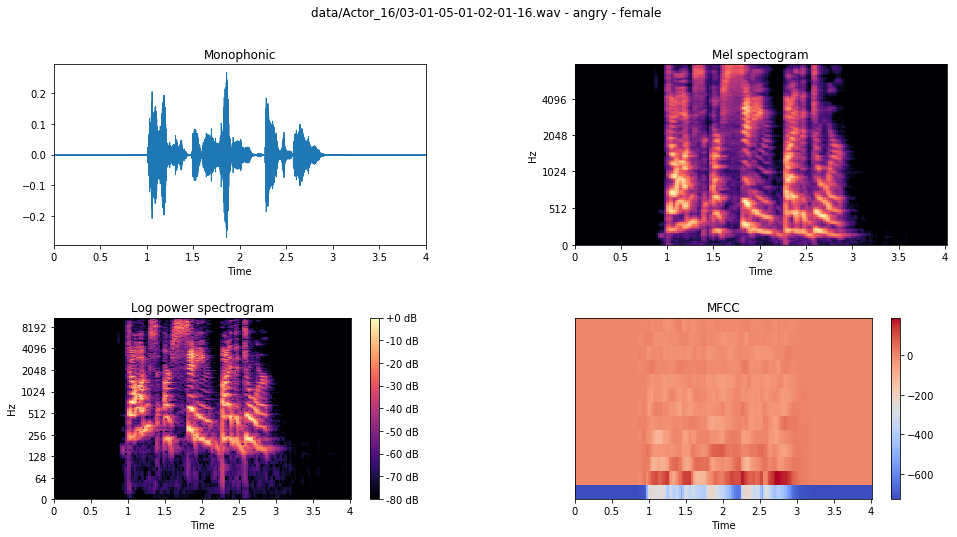

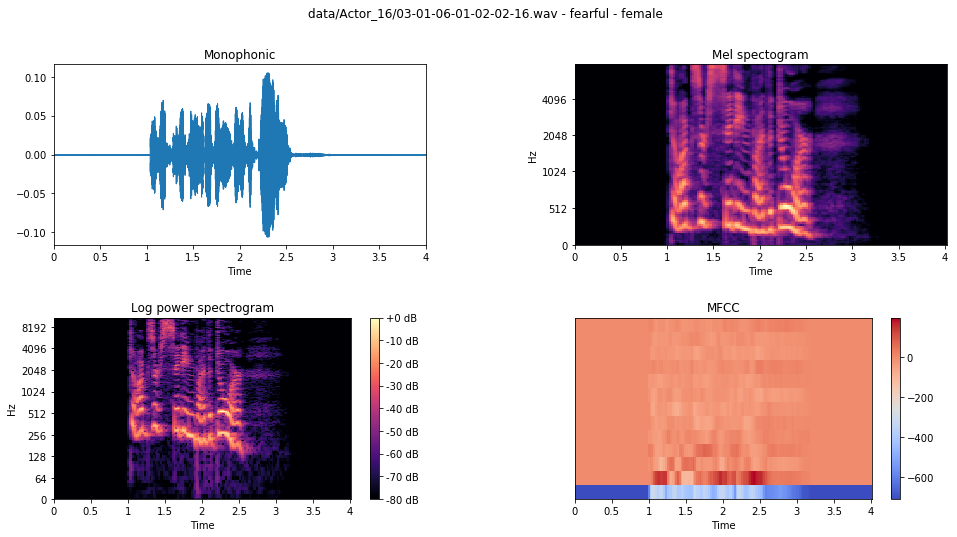

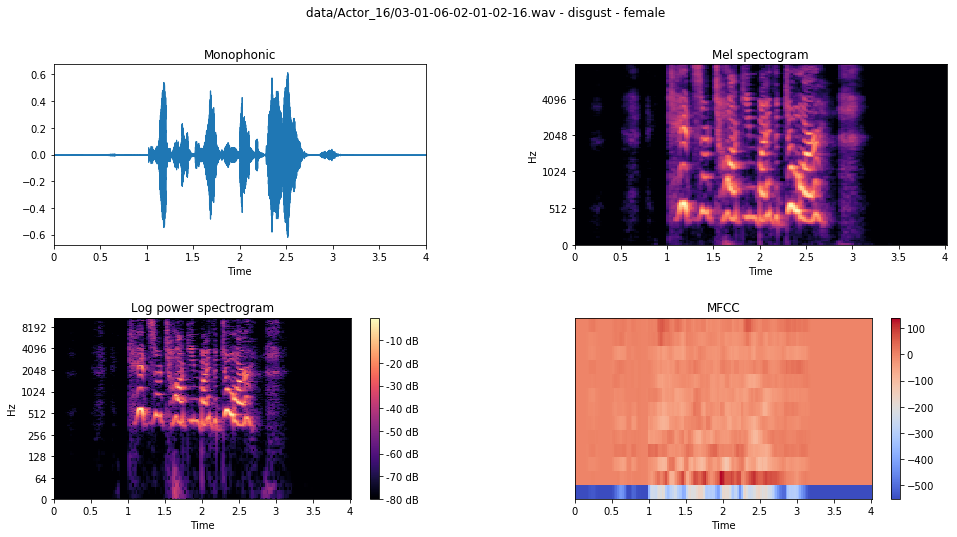

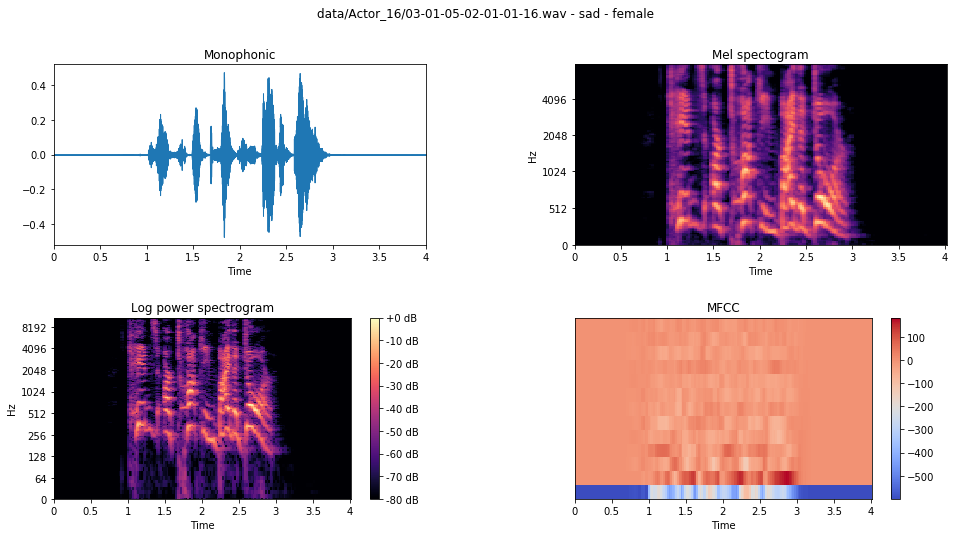

In [191]:
plot_audio(df.iloc[0].path, df.iloc[0].emotion, df.iloc[0].gender)
plot_audio(df.iloc[1].path, df.iloc[1].emotion, df.iloc[1].gender)
plot_audio(df.iloc[2].path, df.iloc[4].emotion, df.iloc[4].gender)
plot_audio(df.iloc[3].path, df.iloc[5].emotion, df.iloc[5].gender)


In [194]:
def process_audio(row):
    audioFilePath = row.path
    
    y, sr = librosa.load(audioFilePath, res_type='kaiser_fast')
    y = librosa.util.fix_length(y, 4*sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    row['mfcc'] = np.ravel(mfccs)
    return row
    
df['mfcc'] = np.nan
df = df.apply(lambda row: process_audio(row), axis=1)

In [247]:
df.head()

,emotion,gender,name,path,mfcc
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav,"[-724.7668691904433, -724.7668691904433, -724...."
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav,"[-708.9087956441897, -708.9087956441897, -708...."
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav,"[-550.7676270610004, -550.7676270610004, -550...."
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav,"[-599.9526496543111, -599.9526496543111, -599...."
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav,"[-826.907373662865, -826.907373662865, -826.90..."


In [196]:
mfcc_values = df['mfcc'].values
predictors = np.empty((0, 2249))
print(mfcc_values.shape)
print(predictors.shape)
print('------')

for index, row in df.filter(['mfcc'], axis=1).iterrows():
    predictors = np.append(predictors, row.array[0].reshape(1,2249), axis=0)
    
print(predictors.shape)


(100,)
(0, 2249)
------
(100, 2249)


In [246]:
print(predictors[0])

[-3.10908775 -3.10908775 -3.10908775 ...  0.          0.
  0.        ]


In [217]:
predictors = predictors / predictors.max()

In [250]:
print(predictors[0])

[-3.10908775 -3.10908775 -3.10908775 ...  0.          0.
  0.        ]


In [251]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

target = df.filter(['emotion'], axis=1)
target = pd.get_dummies(target, columns=['emotion'])

# target = df.filter(['emotion','gender'], axis=1)
# target = pd.get_dummies(target, columns=['emotion','gender'])


In [252]:
print(target.head())
print(target.shape)

   emotion_angry  emotion_calm  emotion_disgust  emotion_fearful  \
0              1             0                0                0   
1              0             0                0                1   
2              0             0                0                1   
3              1             0                0                0   
4              0             0                1                0   

   emotion_happy  emotion_neutral  emotion_sad  emotion_surprised  
0              0                0            0                  0  
1              0                0            0                  0  
2              0                0            0                  0  
3              0                0            0                  0  
4              0                0            0                  0  
(100, 8)


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
model = Sequential()

# add layers1
model.add(Dense(1024, activation='sigmoid', input_shape=(2249,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(8, activation='softmax'))
sgd = optimizers.SGD(lr=0.0005, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# fit models
model_training = model.fit(predictors, target, validation_split=0.25, epochs=3000, verbose=0)


In [309]:
print(model_training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


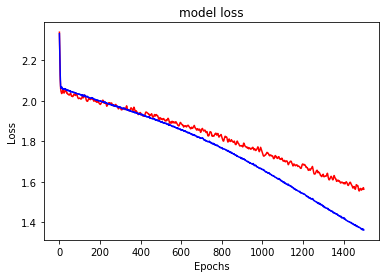

In [310]:
plt.plot(model_training.history['val_loss'], 'r')
plt.plot(model_training.history['loss'], 'b')
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

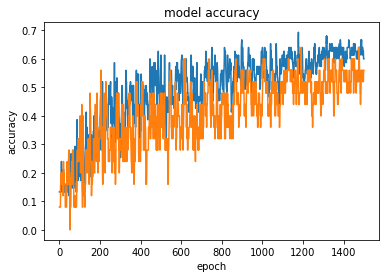

In [311]:
# summarize history for accuracy
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

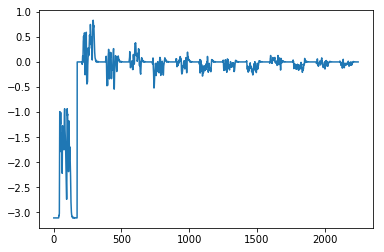

In [278]:
plt.plot(predictors[0])